In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import nltk
dataset = pd.read_csv("rest2.csv")
#stemmatize
#nltk.download('all')m
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
n=len(dataset['Review'])
for i in range(0,n):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
#vectorize the words into 0's and 1's where 0 implies negative and 1 implies positive and create bag pf words
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values #counts number of rows
#splitting the dataset into the training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)
#logistic regression fitting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
logistic_regression= LogisticRegression()
clf=logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shwetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy:  0.8155515370705244


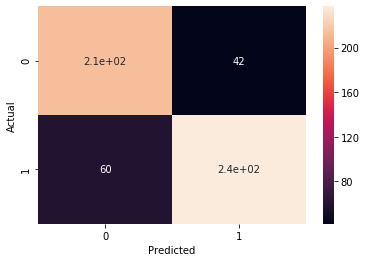

In [38]:
#calculate accuracy using confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

In [39]:
#Example for testing values within dataset
com_test=X[500:505]
sent=dataset['Review'][500:505]
com_pred=logistic_regression.predict(com_test)
com_pred
com_pred2=[]
for i in com_pred:
    if i==0:
        com_pred2.append('bad');
    else :
        com_pred2.append('good');
res=dict(zip(sent,com_pred2))
res

{'Waitress was sweet and funny.': 'good',
 "I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!": 'good',
 "I'd rather eat airline food, seriously.": 'bad',
 'Cant say enough good things about this place.': 'good',
 'The ambiance was incredible.': 'good'}

In [40]:
#module to check if the given comments are good or bad
def testcom(comment):
    comment_pred=clf.predict(cv.transform(comment).toarray())
    comment_pred2=[]
    for i in comment_pred:
        if i==0:
            comment_pred2.append('bad');
        else :
            comment_pred2.append('good');
    res=dict(zip(comment,comment_pred2));
    return res;
#call the function with list of comments as paramenter
print(testcom(["fine","disgusting","unlucky","nice"]))

{'fine': 'good', 'disgusting': 'bad', 'unlucky': 'bad', 'nice': 'good'}
